In [69]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

def load_data(ticker):

    filename = '../data/' + ticker + '_1min_firstratedata.csv'
    df = pd.read_csv(filename)
    df['ticker'] = ticker

    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["date"] = df["timestamp"].dt.date
    df["time"] = df["timestamp"].dt.time
    return df

ticker = 'SPY'
df = load_data(ticker)

In [70]:
def RSI(df, n):
    "function to calculate RSI"
    delta = df["close"].diff()
    delta = delta[1:]
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    df["up"] = up.round(4)
    df["down"] = down.round(4)
    AVG_Gain = df["up"].rolling(window=n).mean()
    AVG_Loss = abs(df["down"].rolling(window=n).mean())
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0 / (1.0 + RS))
    df["RSI_14"] = RSI.round(4)
    df = df.drop(columns=["up", "down"])

    return df

df = RSI(df, 14)

In [71]:
# print the first 20 rows
df.head(20)
df['RSI_14'].describe()

count    207810.000000
mean         50.475689
std          16.468781
min           0.000000
25%          39.130400
50%          50.368100
75%          61.904800
max         100.000000
Name: RSI_14, dtype: float64

In [72]:
import datetime

df = df[df["time"] >= datetime.time(9, 0, 0)]
df = df[df["time"] <= datetime.time(16, 0, 0)]
df.head(20)

,timestamp,open,high,low,close,volume,ticker,date,time,RSI_14
274,2022-09-30 09:00:00,363.52,364.50,363.22,363.30,84336,SPY,2022-09-30,09:00:00,39.3258
275,2022-09-30 09:01:00,363.30,363.60,363.17,363.60,11472,SPY,2022-09-30,09:01:00,49.0909
276,2022-09-30 09:02:00,363.64,363.84,363.64,363.70,9543,SPY,2022-09-30,09:02:00,53.9033
277,2022-09-30 09:03:00,363.60,363.60,363.17,363.22,107253,SPY,2022-09-30,09:03:00,48.3333
278,2022-09-30 09:04:00,363.22,363.23,362.74,362.74,75034,SPY,2022-09-30,09:04:00,44.0729
279,2022-09-30 09:05:00,362.80,362.83,362.64,362.64,19552,SPY,2022-09-30,09:05:00,38.8013
280,2022-09-30 09:06:00,362.71,362.75,362.57,362.57,12858,SPY,2022-09-30,09:06:00,34.0984
281,2022-09-30 09:07:00,362.61,362.76,362.56,362.69,20196,SPY,2022-09-30,09:07:00,40.9894
282,2022-09-30 09:08:00,362.62,362.67,362.30,362.31,76020,SPY,2022-09-30,09:08:00,34.0836
283,2022-09-30 09:09:00,362.38,362.53,362.36,362.47,9493,SPY,2022-09-30,09:09:00,25.1825


In [73]:
# delete columns high and low
df = df.drop(columns=["open", "high", "low", "close", "volume"])
df.head(20)

,timestamp,ticker,date,time,RSI_14
274,2022-09-30 09:00:00,SPY,2022-09-30,09:00:00,39.3258
275,2022-09-30 09:01:00,SPY,2022-09-30,09:01:00,49.0909
276,2022-09-30 09:02:00,SPY,2022-09-30,09:02:00,53.9033
277,2022-09-30 09:03:00,SPY,2022-09-30,09:03:00,48.3333
278,2022-09-30 09:04:00,SPY,2022-09-30,09:04:00,44.0729
279,2022-09-30 09:05:00,SPY,2022-09-30,09:05:00,38.8013
280,2022-09-30 09:06:00,SPY,2022-09-30,09:06:00,34.0984
281,2022-09-30 09:07:00,SPY,2022-09-30,09:07:00,40.9894
282,2022-09-30 09:08:00,SPY,2022-09-30,09:08:00,34.0836
283,2022-09-30 09:09:00,SPY,2022-09-30,09:09:00,25.1825


In [74]:
reshaped_df = df.pivot(index='time', columns='date', values='RSI_14')

In [75]:
reshaped_df.head(20)

date,2022-09-30,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-10,2022-10-11,2022-10-12,2022-10-13,...,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-25,2023-09-26,2023-09-27,2023-09-28,2023-09-29
time,,,,,,,,,,,,,,,,,,,,,
09:00:00,39.3258,61.0738,76.8595,44.8980,43.1818,55.0162,86.6856,31.0811,26.6667,58.9080,...,52.6316,41.6667,84.7826,72.9927,44.5946,37.9310,26.5957,55.1020,50.5814,57.6271
09:01:00,49.0909,61.3333,69.6000,38.4615,36.3184,54.1254,76.5769,33.8235,31.2102,68.7332,...,46.4286,28.7234,85.1064,74.3056,52.0548,26.5152,32.1839,53.6842,48.0663,54.8387
09:02:00,53.9033,52.8571,72.2628,42.1053,34.1584,47.8134,76.5823,45.1220,33.1081,62.2150,...,29.6296,22.4490,81.5789,71.5385,56.5217,30.3704,38.3562,48.4211,55.7895,61.1570
09:03:00,48.3333,50.3759,69.2308,51.4019,36.3158,56.0976,79.4193,37.2671,39.1608,61.0224,...,31.1688,19.1489,71.7949,59.1837,56.5217,29.0780,46.6667,50.5550,60.0000,52.5424
09:04:00,44.0729,48.4375,69.2308,51.4472,33.8798,62.3729,78.9474,43.5754,31.6456,57.3574,...,36.9231,18.0000,71.0679,68.6131,55.7143,15.9593,43.0769,54.0825,68.4783,49.2063
09:05:00,38.8013,39.0244,60.1626,53.9139,30.0000,61.3333,69.8630,39.5210,19.5122,45.0512,...,39.7059,18.3673,61.9048,65.2778,50.0000,25.4098,38.7097,48.6236,63.5838,49.2063
09:06:00,34.0984,41.0256,48.8000,50.9416,36.5385,59.5875,72.6708,46.4516,27.2727,50.1548,...,36.7647,20.0000,72.0930,65.0350,50.7463,23.6641,38.7097,51.4288,61.3497,45.9259
09:07:00,40.9894,56.3025,45.8333,43.8119,38.5093,51.9567,78.0000,47.0588,26.5193,46.2857,...,39.0625,13.9785,75.5556,64.5390,57.3529,20.9459,20.3704,51.4288,59.5092,41.1290
09:08:00,34.0836,59.5041,35.8974,36.8239,45.9016,58.0963,78.0000,39.6450,25.6684,52.8090,...,36.7647,14.1304,75.0000,62.2222,53.2258,14.0127,20.3704,56.7808,49.5100,42.5197


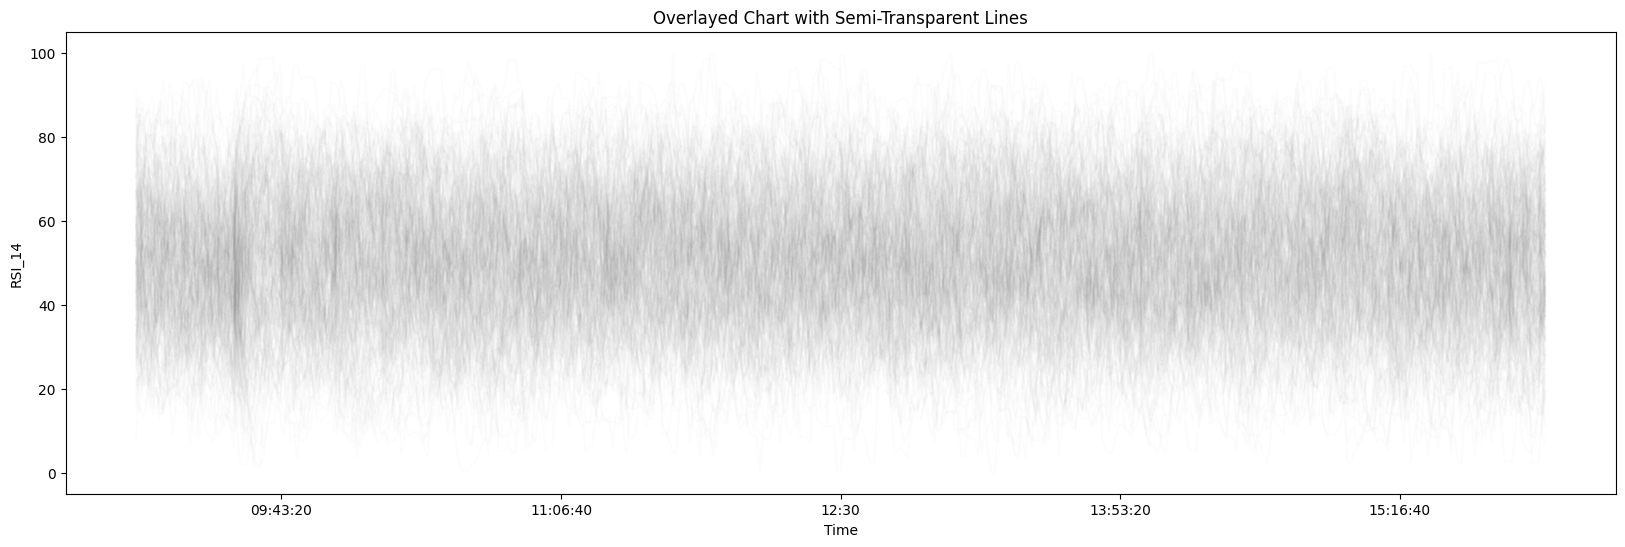

In [80]:
import matplotlib.pyplot as plt

# Assuming reshaped_df is your reshaped DataFrame from the previous step

# Plotting with semi-transparent lines
reshaped_df.plot.line(figsize=(20, 6), color='gray', alpha=0.02, legend=False)

# Setting labels and title
plt.xlabel('Time')
plt.ylabel('RSI_14')
plt.title('Overlayed Chart with Semi-Transparent Lines')

# Display the plot
plt.show()


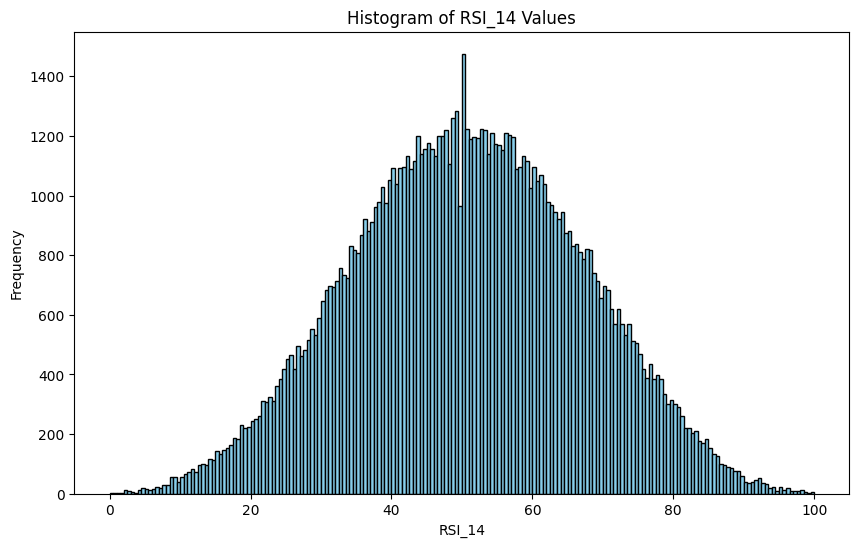

In [83]:
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(df['RSI_14'], bins=100, color='skyblue', edgecolor='black')

# Setting labels and title
plt.xlabel('RSI_14')
plt.ylabel('Frequency')
plt.title('Histogram of RSI_14 Values')

# Display the plot
plt.show()
